In [54]:
#########################PLEASE NOTE DYLAN IS OK FOR ME TO USE SEABORN - RAJAT #####################
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#seaborn settings
sns.set_palette("deep",desat=.6)
sns.set_context(rc={"figure:figsize":(8,4)})

In [56]:
city_df=pd.read_csv("./city_data.csv")

In [57]:
ride_df=pd.read_csv("./ride_data.csv")

In [58]:
city_df.shape

(126, 3)

In [59]:
ride_df.shape

(2375, 4)

In [60]:
x=city_df["city"].unique().tolist()
y=ride_df["city"].unique().tolist()

In [61]:
len(x)

125

In [62]:
len(y)

125

In [63]:
# merging the 2 datasets
city_ride=pd.merge(city_df,ride_df,on='city')

In [64]:
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [65]:
city_ride=city_ride[["city","date","fare","ride_id","driver_count","type"]]

In [66]:
#city_ride.head()

In [67]:
#Buble plot of ride sharing data
#df.plot.scatter(x='a', y='b', s=df['c']*200);
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
#y=Average Fare ($) Per City
#x=Total Number of Rides Per City
#buble_size=Total Number of Drivers Per City
#colors=City Type (Urban, Suburban, Rural)

In [68]:
#create data
city_ride_group=city_ride.groupby(["city","driver_count","type"])
x_axis=city_ride_group["ride_id"].count()
y_axis=city_ride_group["fare"].mean()
#z_axis=city_ride.set_index('city')['driver_count']
#z_axis=city_ride.groupby('driver_count')

In [69]:
df_per_city=pd.DataFrame({"Rides":x_axis,
                          "Average fare":y_axis,
                         #"Drivers Count":z_axis
                         })
df_per_city=df_per_city.reset_index()
df_per_city.max()

city            Zimmermanmouth
driver_count                73
type                     Urban
Average fare             49.62
Rides                       34
dtype: object

In [70]:
#x1_axis=df_per_city[df_per_city['type'] == "Rural"]["Rides"]
#y1_axis=df_per_city[df_per_city['type'] == "Rural"]["Average fare"]
#z1_axis=df_per_city[df_per_city['type'] == "Rural"]["driver_count"]
#df_per_city.plot(kind='scatter',x=df_per_city["Rides"],y=df_per_city["Average fare"],s=df_per_city["driver_count"])
colors={"Urban":'lightskyblue',"Suburban":'lightcoral',"Rural":'gold'}
#sns.lmplot('Rides','Average fare',data=df_per_city,fit_reg=False,hue='type',palette=colors,size=5)
bins=[0,30,60,80]
sizes=[100,200,300]
driver_size=pd.cut(df_per_city['driver_count'],bins,labels=sizes)
sns.lmplot('Rides','Average fare',data=df_per_city,fit_reg=False,hue='type',palette=colors,size=6,scatter_kws={"s":driver_size})

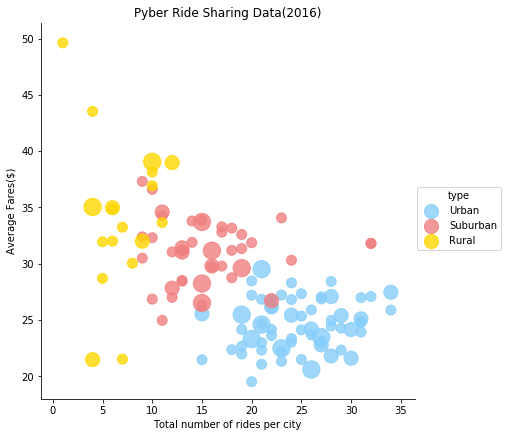

In [71]:
# plot with the seaborn style
#ax=plt.scatter(x1_axis, y1_axis, s=z1_axis, c="gold", alpha=0.6, linewidth=6, label='Rural')

#x2_axis=df_per_city[df_per_city['type'] == "Rural"]["Rides"]
#y2_axis=df_per_city[df_per_city['type'] == "Rural"]["Average fare"]
#z2_axis=df_per_city[df_per_city['type'] == "Rural"]["driver_count"]
#plt.scatter(x2_axis, y2_axis, s=z2_axis, c="blue", alpha=0.6, linewidth=6, label='Urban')
# Add titles (main and on axis)
plt.xlabel("Total number of rides per city")
plt.ylabel("Average Fares($)")
plt.title("Pyber Ride Sharing Data(2016)", loc="center")
plt.show()

In [72]:
### Pie chart for In addition, you will be expected to produce the following three pie charts:
#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

In [73]:
## Preparing data set for piecharts
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


In [74]:
group_by_citytype=city_ride.groupby('type')

In [75]:
fares_by_citytype=group_by_citytype["fare"].sum()
rides_by_citytype=group_by_citytype["ride_id"].count()
drivers_by_citytype=group_by_citytype["driver_count"].sum()
df_city_ride=pd.DataFrame({"fare":fares_by_citytype,
                          "rides":rides_by_citytype,
                        "drivers":drivers_by_citytype
                          })

In [76]:
df_city_ride

,drivers,fare,rides
type,,,
Rural,727,4255.09,125
Suburban,9730,20335.69,657
Urban,64501,40078.34,1625


In [77]:
######################## define function

In [78]:
def plot_pie(sizes,labels,explode,colors):
     plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
     plt.axis("equal")

In [79]:
# ###################3% of Total Fares by City Type#################
labels=["Rural","Suburban","Urban"]

In [80]:
sizes=df_city_ride['fare'].round(2).tolist()

In [81]:
colors = ["gold","lightcoral", "lightskyblue"]

In [82]:
explode=(0.1,0.1,0)

In [94]:
#plt.pie(sizes_fares, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plot_pie(sizes,labels,explode,colors)
#Title
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Fares by City Type')

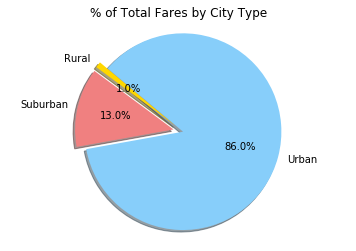

In [95]:
# Prints our pie chart to the screen
plt.show()

In [86]:
##########################% of Total Rides by City Type########################
#labels defined above
sizes=df_city_ride['rides'].round(2).tolist()

In [87]:
colors = ["gold","lightcoral", "lightskyblue"]
explode=(0.1,0.1,0)

In [88]:
# calling function
plot_pie(sizes,labels,explode,colors)
# Titile
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Rides by City Type')

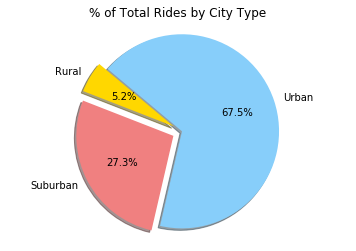

In [89]:
# Prints our pie chart to the screen
plt.show()

In [90]:
####################################% of Total Drivers by City Type############################
#labels defined above

In [91]:
sizes=df_city_ride['drivers'].round(2).tolist()
colors = ["gold","lightcoral", "lightskyblue"]
explode=(0.1,0.1,0)

In [92]:
#calling function
plot_pie(sizes,labels,explode,colors)
# Title
plt.title("% of Total Drives by City Type")

Text(0.5,1,'% of Total Drives by City Type')

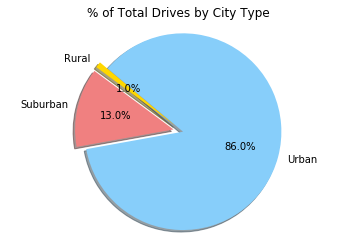

In [93]:
# Prints our pie chart to the screen
plt.show()